In [1]:
# Análisis de la relación entre 'Impresiones' y 'Compartido'. EDA 1. Correlación de 0.88 más grande de mis videos. #CREO QUE NO RENTA
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

datos = pd.read_csv('data\YouTube SirAlatriste datos.csv')

# para ordenar los valores de x en orden ascendente
datos = datos.sort_values(by='Impresiones')

# para crear un scatter plot con Plotly
fig = px.scatter(datos, x='Impresiones', y='Compartido')

# para agregar títulos y etiquetas
fig.update_layout(title='Relación entre Impresiones y las veces que el vídeo ha sido compartido',
                  xaxis_title='Impresiones',
                  yaxis_title='Compartido')

fig.update_xaxes(range=[0, 63000])
fig.update_yaxes(range=[0, 70])
fig.show()

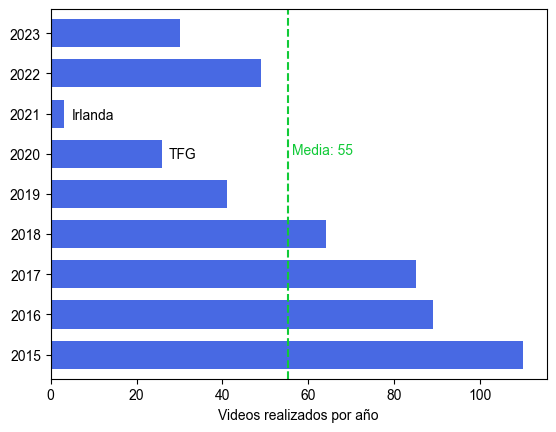

In [2]:
#EDA 2. Todos los videos del canal, con su fecha en años.
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

df = pd.read_csv('data\YouTube SirAlatriste datos.csv')

fechas = df['Fecha']

#convierte las fechas a objetos de fecha y hora
fechas = [datetime.strptime(fecha, '%b %d, %Y') for fecha in fechas]

#extrae el año de cada fecha
años = [fecha.year for fecha in fechas]

#aqui se crea una serie de pandas con los años
años = pd.Series(años)

media = años.value_counts().mean()

#para crear un gráfico de barras con los años
años.value_counts().sort_index().plot(kind='barh', x='Videos realizados', y= 'Año', color= '#4869e3', width=0.7)

sns.set_style('white')

#Dibujar una línea horizontal en el valor de la media
plt.axvline(media, color='#11CA38', linestyle='--')

# así se agrega una etiqueta con el valor de la media
plt.text(media + 1, 5, f'Media: {media:.0f}', color='#11CA38')
plt.text(5, 5.85, 'Irlanda', color='black')
plt.text(27.5, 4.9, 'TFG', color='black')

plt.xlabel('Videos realizados por año')

plt.show()

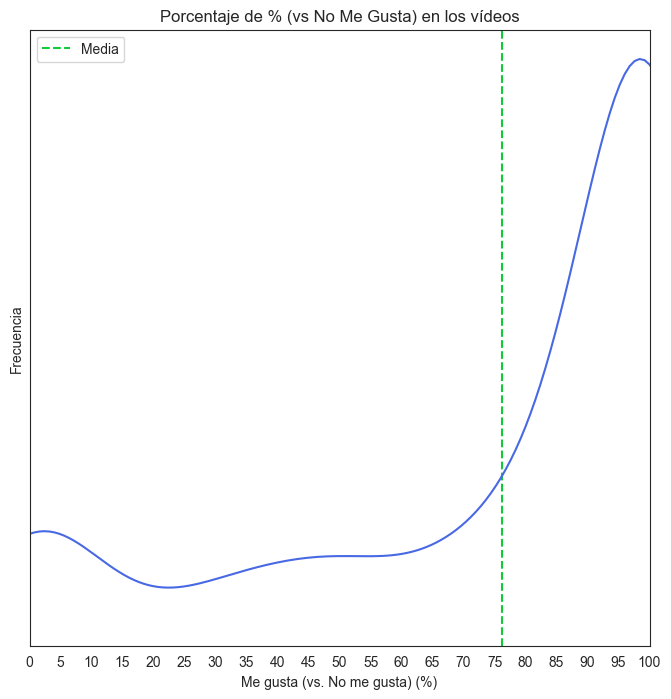

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data\YouTube SirAlatriste datos.csv')

# para extraer los datos de la columna "Me gusta (vs. No me gusta) (%)"
data = data['Me gusta (vs. No me gusta) (%)']

sns.set_style('white')

#para hacer una línea vertical en el valor de la media
media = data.mean()
plt.figure(figsize=(8, 8))
plt.axvline(media, color='#11CA38', linestyle='--', label='Media')

# con esto se crea el gráfico de KDE y se hace el resto de cosas
sns.kdeplot(data, bw_adjust=1, color= '#4869e3')
plt.xticks(range(0, 101, 5));

# para ocultar los valores en el eje y
plt.yticks([]);

plt.title('Porcentaje de % (vs No Me Gusta) en los vídeos')
plt.xlabel('Me gusta (vs. No me gusta) (%)')
plt.ylabel('Frecuencia')

# para ajustar los límites del eje x
plt.xlim(left=0)
plt.xlim(right=100)
plt.legend()
plt.show()

In [4]:
#EDA 4. todos los países en los que se ha visto mi canal de youtube
import folium
import pandas as pd

data = {
    'Área geográfica': ['Total', 'ES', 'BR', 'KR', 'MX', 'AR', 'US', 'TR', 'VN', 'CL', 'RU', 'DE', 'PE', 'CO', 'TW', 'PL', 'FR', 'ID', 'PH', 'CA', 'IT', 'GB', 'TH', 'PT', 'JP', 'SE', 'IN', 'BO', 'GR', 'AU', 'HK', 'EC', 'VE', 'RO', 'CZ', 'NL', 'MY', 'UA', 'RS', 'EG', 'KZ', 'DK', 'CR', 'HU', 'AT', 'DO', 'UY', 'BE', 'SG', 'CH', 'PA', 'BG', 'HR', 'GT', 'MM', 'NO', 'SA', 'PR', 'SK', 'SV', 'PY', 'BY', 'IL', 'TN', 'UZ', 'GE', 'FI', 'IQ', 'KG', 'ZA', 'HN', 'DZ', 'KH', 'MD', 'LT', 'NZ', 'BD', 'MA', 'CY', 'IE', 'NI'],
    'Visualizaciones': [289311, 111935, 21084, 12003, 7709, 4507, 4198, 3756, 2887, 2883, 1963, 1759, 1739, 1715, 1404, 1392, 1310, 1159, 1001, 847, 820, 732, 618, 502, 487, 350, 349, 324, 299, 295, 281, 266, 262, 252, 251, 251, 250, 188, 176, 145, 143, 139, 138, 131, 121, 120, 114, 108, 101, 93, 78, 74, 65, 54, 53, 51, 50, 48, 44, 43, 40, 36, 35, 35, 34, 33, 31, 28, 27, 24, 23, 21, 17, 14, 13, 13, 12, 12, 11, 10, 10]
}

df = pd.DataFrame(data)

# coordenadas de los países, las he juntado aqui y no fuera
coordenadas = {
    'ES': [-3.749220, 40.463667],
    'BR': [-14.235004, -51.925280],
    'KR': [35.907757, 127.766922],
    'MX': [23.634501, -102.552784],
    'AR': [-38.416097, -63.616672],
    'US': [37.090240, -95.712891],
    'TR': [38.963745, 35.243322],
    'VN': [14.058324, 108.277199],
    'CL': [-35.675147, -71.542969],
    'RU': [61.524010, 105.318756],
    'DE': [51.165691, 10.451526],
    'PE': [-9.189967, -75.015152],
    'CO': [4.570868, -74.297333],
    'TW': [23.697810, 120.960515],
    'PL': [51.919438, 19.145136],
    'FR': [46.603354, 1.888334],
    'ID': [-0.789275, 113.921327],
    'PH': [12.879721, 121.774017],
    'CA': [56.130366, -106.346771],
    'IT': [41.871940, 12.567380],
    'GB': [55.378051, -3.435973],
    'TH': [15.870032, 100.992541],
    'PT': [39.399872, -8.224454],
    'JP': [36.204824, 138.252924],
    'SE': [60.128161, 18.643501],
    'IN': [20.593684, 78.962880],
    'BO': [-16.290154, -63.588653],
    'GR': [39.074208, 21.824312],
    'AU': [-25.274398, 133.775136],
    'HK': [22.396428, 114.109497],
    'EC': [-1.831239, -78.183406],
    'VE': [6.423750, -66.589730],
    'RO': [45.943161, 24.966760],
    'CZ': [49.817492, 15.472962],
    'NL': [52.132633, 5.291266],
    'MY': [4.210484, 101.975769],
    'UA': [48.379433, 31.165580],
    'RS': [44.016521, 21.005859],
    'EG': [26.820553, 30.802498],
    'KZ': [48.019573, 66.923684],
    'DK': [56.263920, 9.501785],
    'CR': [9.748917, -83.753428],
    'HU': [47.162494, 19.503304],
    'AT': [47.516231, 14.550072],
    'DO': [18.735693, -70.162651],
    'UY': [-32.522779, -55.765835],
    'BE': [50.503887, 4.469936],
    'SG': [1.352083, 103.819836],
    'CH': [46.818188, 8.227512],
    'PA': [8.537981, -80.782127],
    'BG': [42.733883, 25.485830],
    'HR': [45.1, 15.2],
    'GT': [15.783471, -90.230759],
    'MM': [21.913965, 95.956223],
    'NO': [60.472024, 8.468946],
    'SA': [23.885942, 45.079162],
    'PR': [18.220833, -66.590149],
    'SK': [48.669026, 19.699024],
    'SV': [13.794185, -88.896530],
    'PY': [-23.442503, -58.443832],
    'BY': [53.709807, 27.953389],
    'IL': [31.046051, 34.851612],
    'TN': [33.886917, 9.537499],
    'UZ': [41.377491, 64.585262],
    'GE': [42.315407, 43.356892],
    'FI': [61.924110, 25.748151],
    'IQ': [33.223191, 43.679291],
    'KG': [41.204380, 74.766098],
    'ZA': [-30.559482, 22.937506],
    'HN': [15.199999, -86.241905],
    'DZ': [28.033886, 1.659626],
    'KH': [12.565679, 104.990963],
    'MD': [47.411631, 28.369885],
    'LT': [55.169438, 23.881275],
    'NZ': [-40.900557, 174.885971],
    'BD': [23.684994, 90.356331],
    'MA': [31.791702, -7.092620],
    'CY': [35.126413, 33.429859],
    'IE': [53.412910, -8.243890],
    'NI': [12.865416, -85.207229]
}

# para crear un mapa centrado en las coordenadas globales
m = folium.Map(location=[0, 0], zoom_start=2)

# para agregar todos los paises al mapa
for index, row in df.iterrows():
    if row['Área geográfica'] != 'Total':
        country_code = row['Área geográfica']
        if country_code in coordenadas:
            lat, lon = coordenadas[country_code]
            folium.CircleMarker(
                location=[lat, lon],
                radius=row['Visualizaciones'] / 750,  # es el mejor tamaño según he ido probando
                color='#4869e3',
                fill=True,
                fill_color='#4869e3',
                fill_opacity=0.6,
                tooltip=row['Área geográfica'] + ': ' + str(row['Visualizaciones'])
            ).add_to(m)

# para que muestre el mapa
m

m.save("folium_map.html")


In [5]:
#EDA 5. Análisis de los sistemas operativos usados para ver SirAlatriste
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline

datos = pd.read_csv('data\SirAlatriste Sistema operativo.csv')

fig = make_subplots(specs=[[{}]])

fig.add_trace(go.Scatter(x=datos['Sistema operativo'], y=datos['Visualizaciones'], mode='lines', name='Visualizaciones'))
fig.add_trace(go.Scatter(x=datos['Sistema operativo'], y=datos['Tiempo de visualización (horas)'], mode='lines', name='Tiempo de visualización (horas)'))
fig.add_trace(go.Scatter(x=datos['Sistema operativo'], y=datos['Duración media de las visualizaciones'], mode='lines', name='Duración media de las visualizaciones (min)'))
fig.add_trace(go.Scatter(x=datos['Sistema operativo'], y=datos['Porcentaje medio visto (%)'], mode='lines', name='Porcentaje medio visto por vídeo'))

fig.update_layout(title='Sistemas operativos usados en SirAlatriste', xaxis_title='Sistema Operativo')

fig.show()

# plotly.offline.plot(fig, filename='grafico plotly.html')

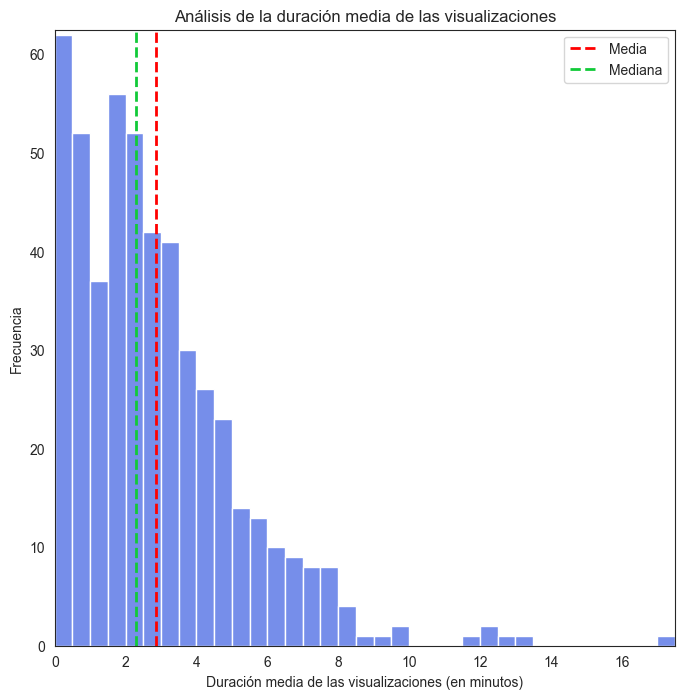

In [6]:
#Análisis de la duración media de las visualizaciones. EDA 6.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv('data\YouTube SirAlatriste datos.csv')

# para ordenar los valores del eje x
datos_sorted = datos.sort_values('Duración media de las visualizaciones')

sns.set_style('white')
plt.figure(figsize=(8, 8)) #tamaño

# histograma con Seaborn
sns.histplot(data=datos_sorted, x='Duración media de las visualizaciones', binwidth=0.5, binrange=(0, 18), color='#4869e3')

# para agregar un título al gráfico
plt.title('Análisis de la duración media de las visualizaciones')

media = datos['Duración media de las visualizaciones'].mean()
mediana = datos['Duración media de las visualizaciones'].median()

plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mediana, color='#11CA38', linestyle='dashed', linewidth=2, label='Mediana')

# agregar etiquetas a los ejes
plt.xlabel('Duración media de las visualizaciones (en minutos)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0);
plt.xlim(0, 17.5)
plt.ylim(0, 62.5)
plt.legend()

plt.show()

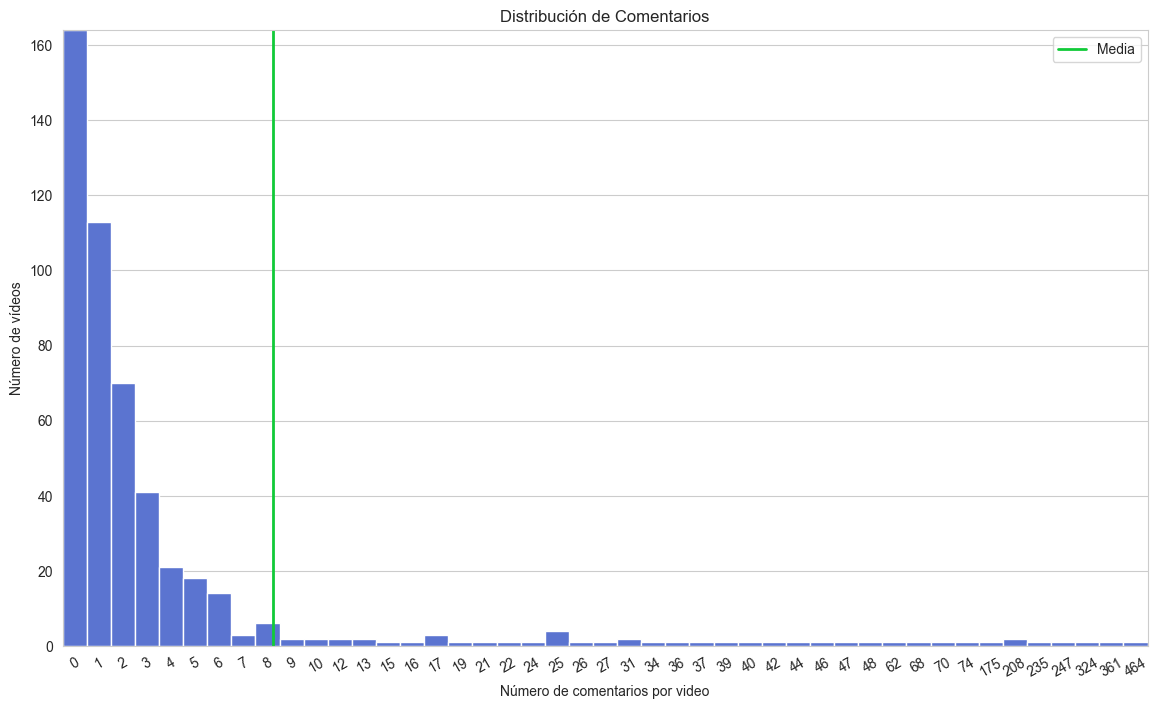

In [7]:
#Análisis de la distribución de comentarios. EDA 7.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv('data\YouTube SirAlatriste datos.csv')

plt.figure(figsize=(14, 8))

sns.set_style('whitegrid')

# para crear un gráfico de barras con Seaborn
sns.countplot(data=datos, x='Comentarios', color='#4869e3', width=1)

#para poner la media
media_comentarios = datos['Comentarios'].mean()

plt.axvline(media_comentarios, color='#11CA38', linestyle='-', linewidth=2, label='Media')

# para agregar un título al gráfico
plt.title('Distribución de Comentarios')

plt.xticks(rotation=30)
plt.ylabel('Número de vídeos')
plt.xlabel('Número de comentarios por video')

plt.ylim(0,164)
plt.legend()

plt.show()

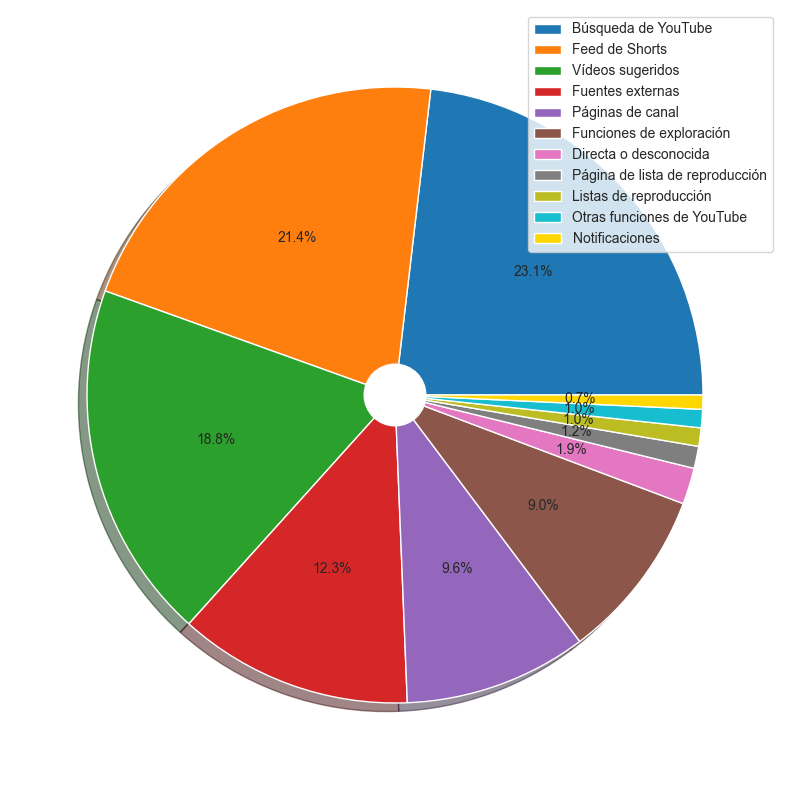

In [8]:
#EDA 8. fuentes de tráfico a través de las cuales se ha visto mi canal de youtube
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\SirAlatriste Fuente tráfico.csv')
datos_visualizaciones = df['Visualizaciones']
datos_fuente_de_tráfico = df['Fuente de tráfico']
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FFD700']

plt.figure(figsize=(10, 10))
plt.pie(datos_visualizaciones, colors=colores, autopct='%1.1f%%', shadow=True, startangle=360)
plt.legend(labels=datos_fuente_de_tráfico)

my_circle = plt.Circle((0, 0), 0.1, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

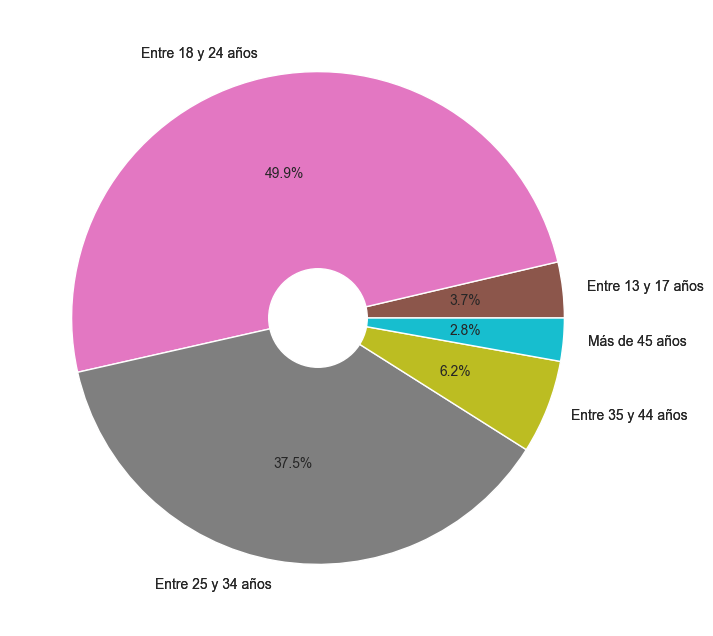

In [9]:
#Una pie para saber cual es la edad aproximada de la audiencia. EDA 9
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\SirAlatriste edad espectador.csv')

datos = df[['Edad del espectador', 'Visualizaciones (%)']]

# se reemplaza 'Visualizaciones (%)' con el nombre de la columna que contiene los datos
# luego reemplazo 'Nombres' con el nombre de la columna que contiene los nombres de los valores
datos = df['Visualizaciones (%)']
nombres = df['Edad del espectador']

plt.figure(figsize=(8, 8)) 
plt.pie(datos, labels=nombres)

# se ha de crear el gráfico circular con los datos y los nombres con el argumento 'autopct' para mostrar los valores dentro de cada pieza de la tarta

plt.pie(datos, labels=nombres, autopct='%1.1f%%')

my_circle = plt.Circle((0, 0), 0.2, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

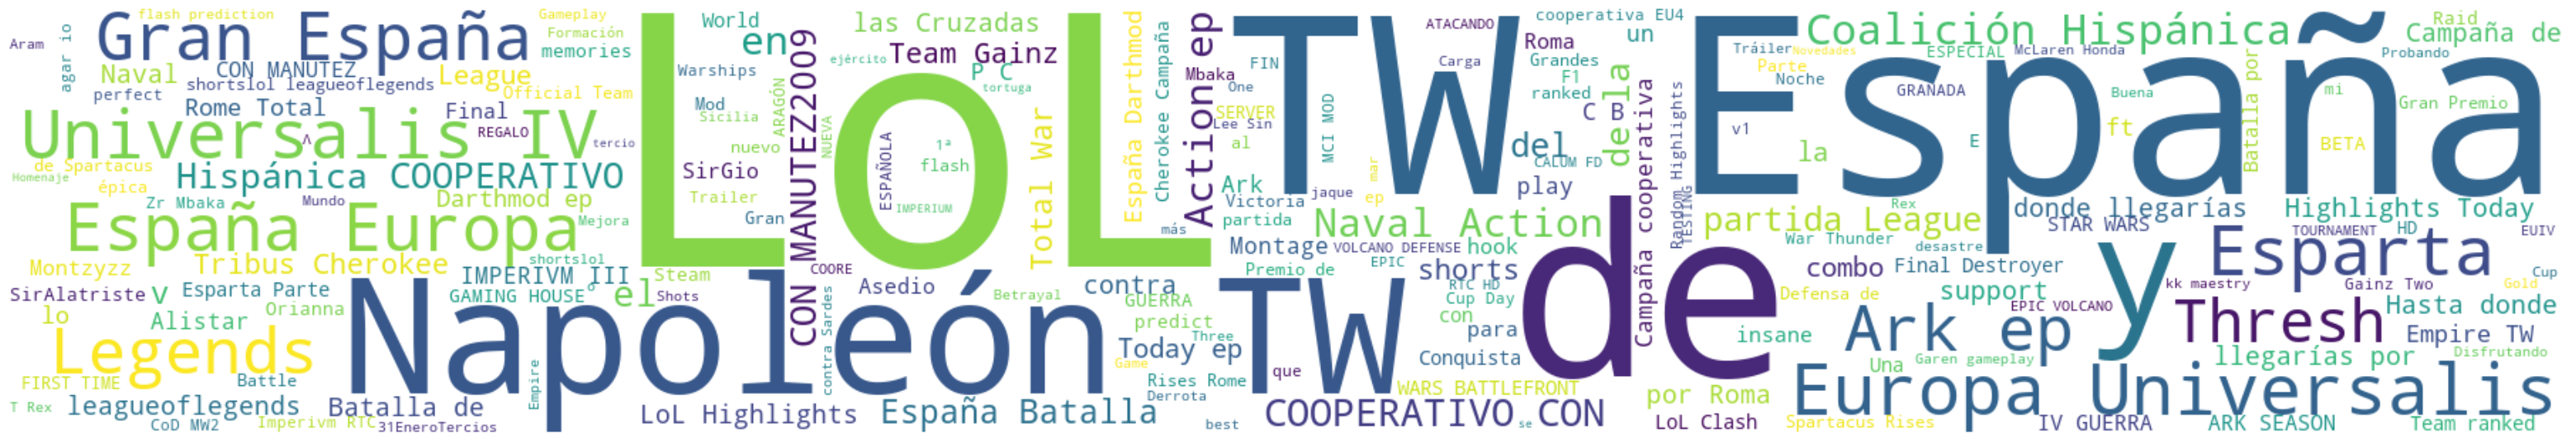

In [10]:
#EDA 10. Las palabras que más se repiten en los títulos de mis videos
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_csv('data\YouTube SirAlatriste datos.csv')

# todos los títulos en un solo texto
texto_titulos = ' '.join(datos['Título del vídeo'].tolist())

# para crear la nube de palabras con WordCloud
wordcloud = WordCloud(width=1800, height=300, background_color='white').generate(texto_titulos)

# Para mostrar la nube de palabras con Matplotlib
plt.figure(figsize=(40, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

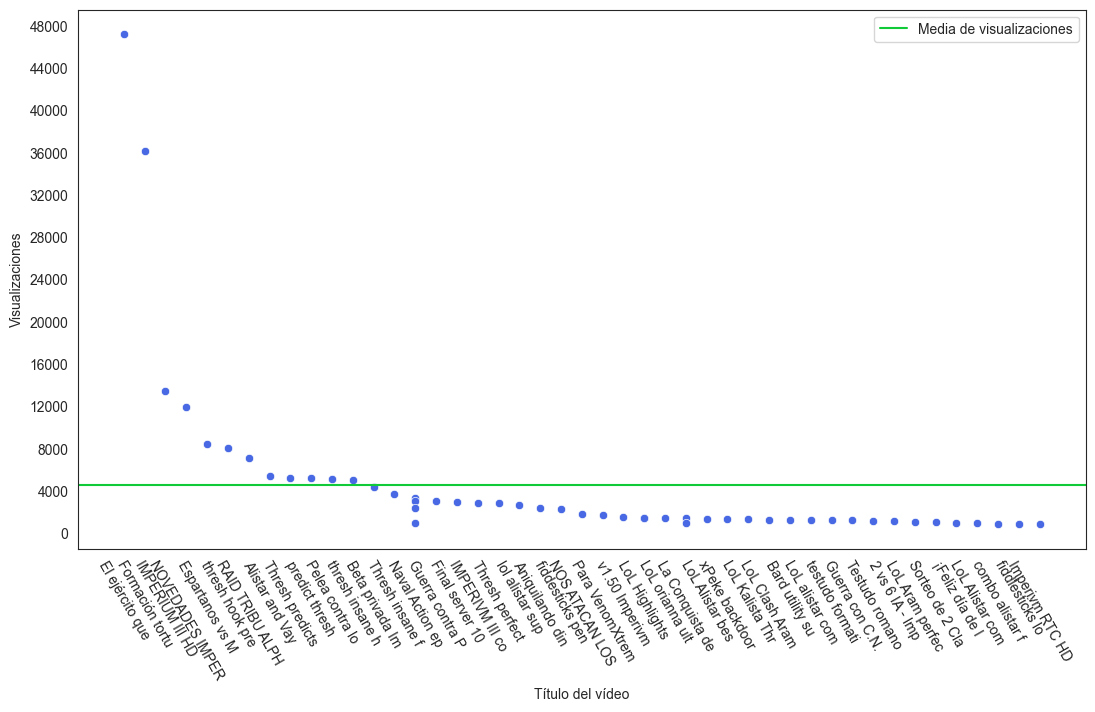

In [11]:
# Gráfico de barras para comparar las visualizaciones de mis 50 primeros videos. EDA 11. CAMBIAR A PUNTITOS DE COLORES CON DENSIDAD.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\YouTube SirAlatriste datos.csv')

#reducir el titulo
df['Título del vídeo'] = df['Título del vídeo'].apply(lambda x: x[:15])

sns.set_style('white')

# scatter plot con Seaborn
plt.figure(figsize=(13, 7))
sns.scatterplot(x='Título del vídeo', y='Visualizaciones', data=df.head(50), color='#4869e3')
plt.xticks(rotation=300);
plt.yticks(range(0, 49000, 4000));

# para agregar una línea horizontal que representa la media de las visualizaciones
mean_views = df.head(50)['Visualizaciones'].mean()
plt.axhline(mean_views, color='#11CA38', linestyle='-', label='Media de visualizaciones')
plt.legend();

C:\Users\Braulio\AppData\Local\Temp\ipykernel_9224\3122937651.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



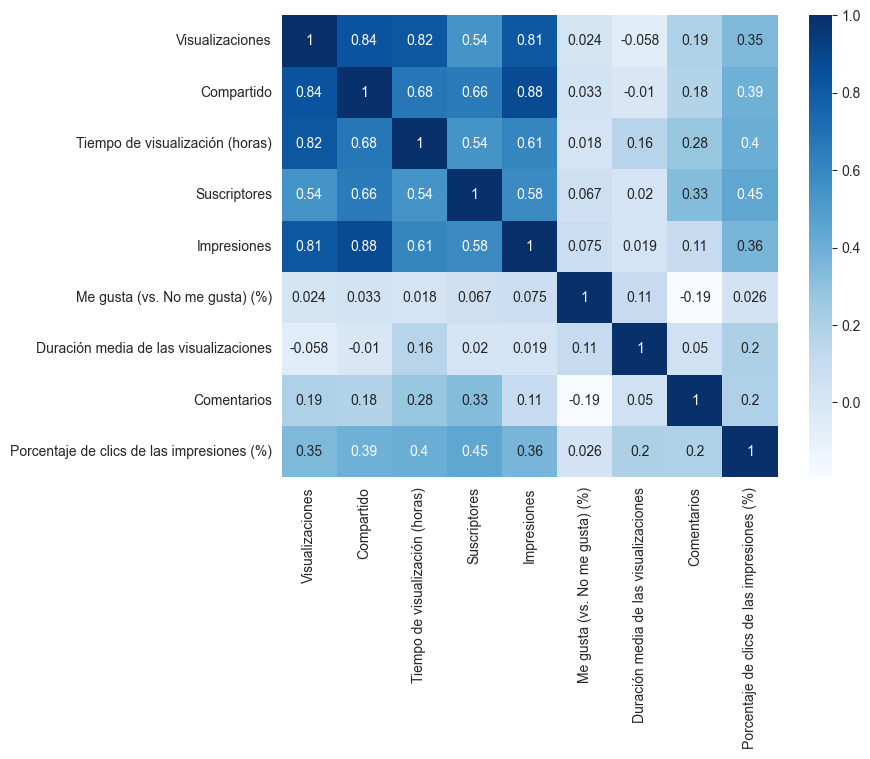

In [17]:
#heatmap de todas las variables de los datos de los videos. EDA 12
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data\YouTube SirAlatriste datos.csv')

sns.set_style('white')
# matriz de correlación
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show()

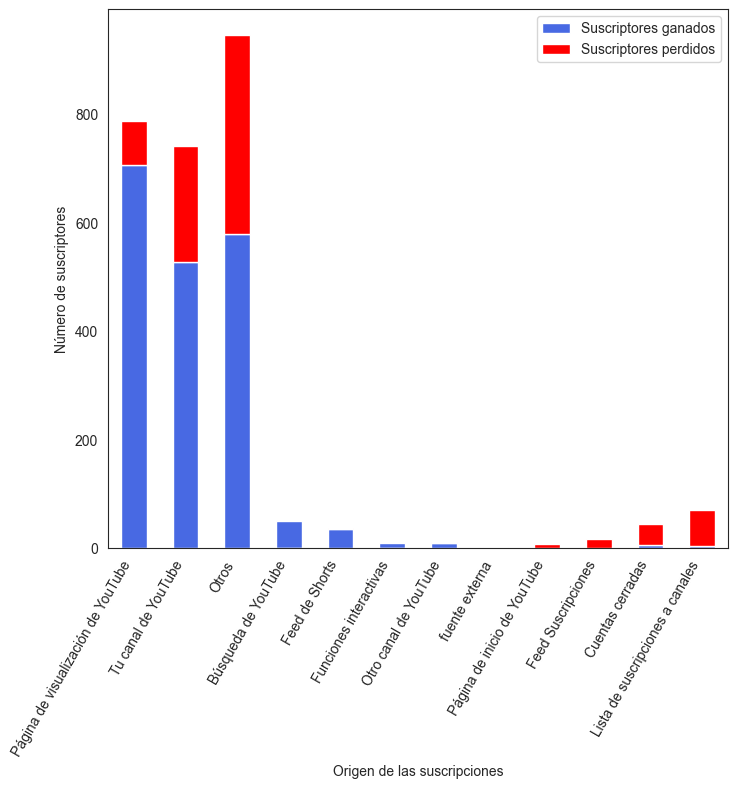

In [26]:
#EDA 13. #origen de las suscripciones del canal. como hay pocos datos he preferido ponerlos aqui directamente como he hecho otras veces
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# prefiero crear el DataFrame con los datos
data = {'Origen de las suscripciones': ['Página de visualización de YouTube', 'Tu canal de YouTube', 'Otros', 'Búsqueda de YouTube', 'Feed de Shorts', 'Funciones interactivas', 'Otro canal de YouTube', 'fuente externa', 'Página de inicio de YouTube', 'Feed Suscripciones', 'Cuentas cerradas', 'Lista de suscripciones a canales'],
        'Suscriptores': [627, 313, 212, 51, 35, 9, 9, 1, -8, -17, -33, -63],
        'Suscriptores ganados': [707, 527, 579, 51, 36, 9, 10, 2, 0, 0, 6, 4],
        'Suscriptores perdidos': [80, 214, 367, 0, 1, 0, 1, 1, 8, 17, 39, 67]}

df = pd.DataFrame(data)

sns.set_style('white')

# el gráfico de columnas apiladas
df.plot(x='Origen de las suscripciones', y=['Suscriptores ganados', 'Suscriptores perdidos'], kind='bar', stacked=True, color=['#4869e3', '#Ff0000'], figsize=(8,7))

# etiquetas a los ejes
plt.xlabel('Origen de las suscripciones')
plt.ylabel('Número de suscriptores')
plt.xticks(rotation=60, ha='right');

plt.show()

In [14]:
#EDA 14. Días gloriosos del canal en función de 5 variables
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline

datos = pd.read_csv('data\SirAlatriste Días gloriosos.csv', nrows=497)

fig = make_subplots(specs=[[{}]])

fig.add_trace(go.Scatter(x=datos['Fecha'], y=datos['Comentarios añadidos'], mode='markers', name='Comentarios añadidos'))
fig.add_trace(go.Scatter(x=datos['Fecha'], y=datos['Suscriptores'], mode='markers', name='Suscriptores'))
fig.add_trace(go.Scatter(x=datos['Fecha'], y=datos['Visualizaciones'], mode='markers', name='Visualizaciones'))
fig.add_trace(go.Scatter(x=datos['Fecha'], y=datos['Tiempo de visualización (horas)'], mode='markers', name='Tiempo de visualización (horas)'))
fig.add_trace(go.Scatter(x=datos['Fecha'], y=datos['Duración media de las visualizaciones'], mode='markers', name='Duración media de las visualizaciones (min)'))

fig.update_layout(title='Días gloriosos en SirAlatriste', xaxis_title='Fechas')

fig.show()

# plotly.offline.plot(fig, filename='grafico 2 plotly.html')

In [15]:
#EDA 15. Playlist del canal. Cuales han sido mejores en función de varios datos
import plotly.express as px
import pandas as pd

df = pd.read_csv('data\YouTube SirAlatriste Playlists.csv')

# lista con las variables de color, osea con aquellas columnas que mandan los datos
color_vars = ['Tiempo de visualización de la lista de reproducción (horas)', 'Duración media de las visualizaciones de la lista de reproducción', 'Visualizaciones de la lista de reproducción']

# lista con los treemaps para cada variable de color
treemaps = []
for color_var in color_vars:
    # esto cambia el DataFrame en función de la variable de color de cada variable.. he conseguido ponerlo en orden y cuadrar el texto en el centro de la celda
    df_sorted = df.sort_values(by=color_var)
    
    treemap = go.Treemap(
        labels=df_sorted['Título de la lista de reproducción'],
        parents=[''] * len(df),
        values=df_sorted[color_var],
        marker=dict(colors=df_sorted[color_var], colorscale='Blues'),
        textinfo='label+value',
        textposition='middle center',
        name=color_var)
    
    treemaps.append(treemap)
    

# MENÚ DESPEGABLE

updatemenus = [dict(
    type='dropdown',
    showactive=True,
    buttons=[dict(
        label=color_var,
        method='update',
        args=[{'visible': [color_var == c for c in color_vars]},
              {'data': [treemaps[color_vars.index(color_var)]]}]
    ) for color_var in color_vars])]

# layout del gráfico
layout = go.Layout(updatemenus=updatemenus)

fig = go.Figure(data=treemaps, layout=layout)

fig.show()

#plotly.offline.plot(fig, filename='grafico 3 plotly.html')

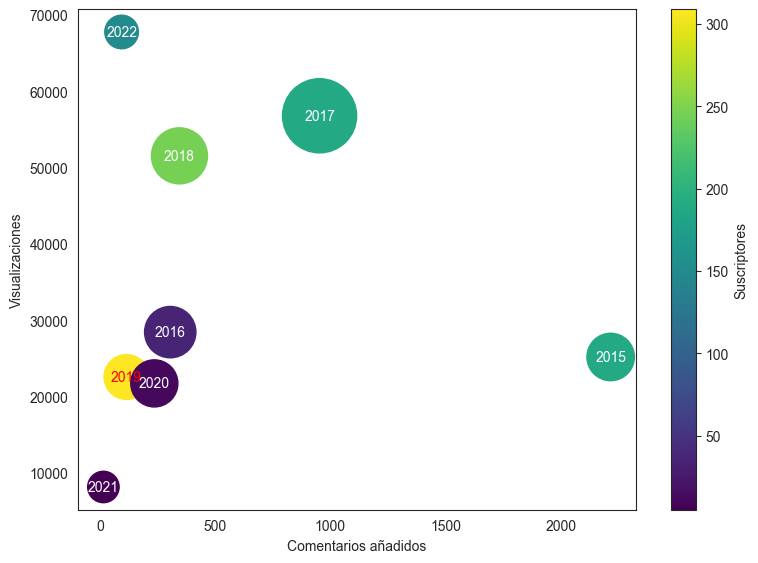

In [27]:
#EDA 16. Cual ha sido el mejor año de SirAlatriste en función de Comentarios añadidos, Visualizaciones, Tiempo de visualización (horas), Suscriptores

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data\Años SirAlatriste.csv')

# para extraer los datos de las 4 columnas del csv
x = data['Comentarios añadidos']
y = data['Visualizaciones']
size = data['Tiempo de visualización (horas)'] #el tamaño de los círculos
color = data['Suscriptores'] #los colores
labels = data['Contenido']

sns.set_style('white')

# para crear el gráfico de burbujas
plt.figure(figsize=(9, 6.5))
plt.scatter(x, y, s=size, c=color, alpha=1, cmap='viridis')

# para agregar etiquetas a cada burbuja
for i, label in enumerate(labels): #para cambiar la fuente y centrar los valores
    if label == 2019:
        plt.annotate(label, (x[i], y[i]), ha='center', va='center', color='red') #para que se vea mejor el 2019
    else:
        plt.annotate(label, (x[i], y[i]), ha='center', va='center', color='white') #el resto

plt.xlabel('Comentarios añadidos')
plt.ylabel('Visualizaciones')
plt.colorbar(label='Suscriptores')
plt.show()